In [1]:
import numpy as np
import time
from evolution_strategy import *
from function import *
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.cross_validation import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

/usr/local/lib/python3.5/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
X = PCA(n_components=2).fit_transform(MinMaxScaler().fit_transform(df.iloc[:, 1:-1]))
Y = LabelEncoder().fit_transform(df.iloc[:, -1])
one_hot = np.zeros((Y.shape[0], 3))
for i in range(Y.shape[0]):
    one_hot[i, Y[i]] = 1.0
    
train_X, test_X, train_Y, test_Y, train_label, test_label = train_test_split(X,one_hot,Y, test_size = 0.2)

In [4]:
X.shape

(150, 2)

In [5]:
size_population = 50
sigma = 0.1
learning_rate = 0.001
epoch = 500

'''
class Deep_Evolution_Strategy:
    
    def __init__(self, weights, inputs, solutions, reward_function, population_size, sigma, learning_rate):
    
weights = array of weights, no safe checking
inputs = our input matrix
solutions = our Y matrix
reward_function = cost function, can check function.py

Check example below on how to initialize the model and train any dataset

len(activations) == len(weights)

def train(self, epoch = 100, print_every = 5, activation_function = None):
'''

weights = [np.random.randn(X.shape[1]),
           np.random.randn(X.shape[1],20),
           np.random.randn(20,one_hot.shape[1])]
activations = [sigmoid, sigmoid, softmax]
deep_evolution = Deep_Evolution_Strategy(weights, train_X, train_Y, cross_entropy, size_population, sigma, learning_rate)
deep_evolution.train(epoch=1000,print_every = 50, activation_function = activations)

iter 50. reward: -1.940076
iter 100. reward: -1.612582
iter 150. reward: -1.287847
iter 200. reward: -0.972405
iter 250. reward: -0.712362
iter 300. reward: -0.531363
iter 350. reward: -0.404615
iter 400. reward: -0.360060
iter 450. reward: -0.343336
iter 500. reward: -0.327325
iter 550. reward: -0.310035
iter 600. reward: -0.293520
iter 650. reward: -0.277492
iter 700. reward: -0.261130
iter 750. reward: -0.245748
iter 800. reward: -0.231955
iter 850. reward: -0.219287
iter 900. reward: -0.207579
iter 950. reward: -0.197883
iter 1000. reward: -0.188847
time taken to train: 5.6465232372283936 seconds


### Accuracy training

In [6]:
predicted= np.argmax(deep_evolution.predict(deep_evolution.get_weight(), train_X, activation_function = activations),axis=1)
print(metrics.classification_report(predicted, np.argmax(train_Y, axis=1), target_names = ['flower 1', 'flower 2', 'flower 3']))

             precision    recall  f1-score   support

   flower 1       1.00      0.93      0.96        40
   flower 2       0.67      0.97      0.79        29
   flower 3       0.98      0.78      0.87        51

avg / total       0.91      0.88      0.88       120



## Accuracy testing

In [7]:
predicted= np.argmax(deep_evolution.predict(deep_evolution.get_weight(), test_X, activation_function = activations),axis=1)
print(metrics.classification_report(predicted, np.argmax(test_Y, axis=1), target_names = ['flower 1', 'flower 2', 'flower 3']))

             precision    recall  f1-score   support

   flower 1       1.00      1.00      1.00        13
   flower 2       1.00      1.00      1.00         8
   flower 3       1.00      1.00      1.00         9

avg / total       1.00      1.00      1.00        30



In [12]:
accuracy_test = np.mean(predicted == np.argmax(test_Y, axis=1))

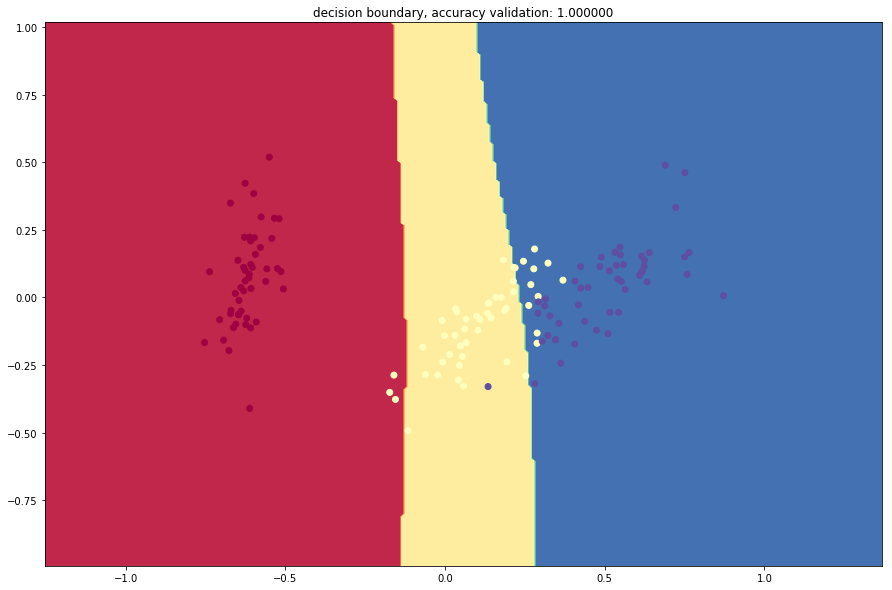

In [15]:

plt.figure(figsize=(15,10))
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = 0.01
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = np.argmax(deep_evolution.predict(deep_evolution.get_weight(), np.c_[xx.ravel(), yy.ravel()], activation_function = activations),axis=1)
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Spectral)
plt.title('decision boundary, accuracy validation: %f'%(accuracy_test))
plt.show()